<a href="https://colab.research.google.com/github/aaubs/ds-master/blob/main/notebooks/M3_RNN_Tutorial_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The objective of this tutorial

Our goal in this tutorial is to provide simple examples of the RNN model so that you can better understand its functionality and how it can be used in a domain.

After completing this tutorial, you will know:


```
1. What is a recurrent neural network (RNN)?
2. How do RNNs work and what is their structure?
3. How can RNNs be used for tasks such as time series analysis?
4. How to implement an RNN in code using PyTorch?
5. How to train an RNN for a specific task?
6. What are some common challenges and pitfalls to avoid when working with RNNs?
```


## A quick recap on Simple Neural Network (FeedForward)

A simple neural network consists of three different parts namely Parameters, Linear, and None-Linear (Activation Function ) parts:

1. First, a weight is being applied to each input to an artificial neuron.
2. Second, the inputs are multiplied by their weights, and then a bias is applied to the outcome. This is called the weighted sum.
3. Third, the weighted sum is processed via an activation function, as a non-linear function.

<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/02/13UpdymQx-C1tBKRnfD7eOg.gif" width="500">

The neural network can compare the outputs of its nodes with the desired values using a property known as the delta rule, allowing the network to alter its weights through training to create more accurate output values. This training and learning procedure results in gradient descent.

The technique of updating weights in multi-layered perceptrons is virtually the same, however, the process is referred to as back-propagation. In such circumstances, the output values provided by the final layer are used to alter each hidden layer inside the network.

### Problems with a Simple Neural Network

The main shortcomings of traditional neural networks are:

1. They can not handle sequential data
2. They can not remember the sequence of the data, i.e order is not important
3. Can not share parameters across the sequence
4. They have a fixed input length

Let’s have a brief look at these problems, then dig deeper into RNN.

#### 1. They can not handle sequential data

Sequential data in RNN (Recurrent Neural Network) refers to any type of data where the observations have a temporal or sequential relationship. This could include time series data, where each observation is dependent on the previous one, or sequence data, where the order of the observations is important. In RNNs, this type of data is processed through the recurrent connections in the network, allowing the model to maintain and update an internal state based on the information in the sequence. This makes RNNs particularly well suited for tasks such as language modeling, speech recognition, and time series forecasting. There are some variations to the neural network’s configuration based on the shape of the input or output which you can see in the following:

<img src="https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/SeqData_RNN.png" width="400">



#### 2. They can not remember the sequence of the data, i.e order is not important

The second limitation of traditional neural networks is that they can not remember the sequence of the data, or the order is not important to them. Let’s understand this problem with an example which is shown in this figure (MIT 6.S191 Intro to Deep Learning).

![image.jpeg](https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/Problems-with-Traditional-Neural-Network-2.jpeg)



> *RNNs use feedback connections that allow information to be passed from one step of the sequence to the next, allowing the network to maintain and update an internal state that depends on the past input. This enables RNNs to capture and understand the dependencies and patterns in the sequence data, making them well suited for tasks such as natural language processing and time series analysis.*



#### 3. FeedForward Neural Network Can not share parameters across the sequence

In traditional Feedforward Neural Networks (MLPs), each input is processed independently and there is no mechanism for sharing parameters across different inputs in a sequence. For example, let’s take the sentence **“what is your name? My name is Lasse”**. In an MLP, each word would be treated as a separate input and would be processed through separate hidden layers. There is no way for the network to share information across words in the sequence, such as information about the relationship between words or about common features that occur across different parts of the sequence. In this case, "name"'s parameters should have been shared and so the neural network should have been able to determine that "name"'s words are dependent in this sentence.



> *In contrast, Recurrent Neural Networks (RNNs) have a hidden state that is updated at each time step, allowing the network to maintain information about the sequence and share parameters across different time steps. This makes RNNs well-suited for processing sequential data and for tasks such as sequence classification, language modeling, and machine translation*




Therefore Recurrent Neural Networks (RNN), originally were designed to handle some of the shortcomings that traditional neural networks have when dealing with sequential data.

## What is a Recurrent Neural Network?

Here we can see that the Simple Neural Network is unidirectional, which means it has a single direction, whereas the RNN, has loops inside it to persist the information over timestamp t. This looping preserves the information over the sequence.

<img src="https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/FNN-RNN.png" width="500">

#### Structure of RNN

Now, let’s dig deeper to understand what is happening under the hood. An RNN consists of four different parts:
1. Linear part (Parameters: This includes the weights and biases of the input-to-hidden layer, the hidden-to-hidden layer, and the hidden-to-output layer.)
> *The hidden state is used to capture the information from the previous time steps, but this information is not relevant after the training process is finished. Therefore, resetting the hidden state parameters to zero ensures that the network starts with a clean slate for making predictions on new, unseen data.*

2. The hidden state (also known as the context state)
> *you can think of the hidden state as representing the "memory" of the network, which is updated at each time step and used to produce the output.*


3. Non-Linear part (Activation Function (Tanh))
> As you can see in the equation above, you feed in both input vector Xt and the previous state ht-1 into the function. Here you’ll have 2 separate weight matrices then apply the Non-linearity (tanh) to the sum of input Xt and previous state ht-1 after multiplication to these 2 weight matrices.
<img src="https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/sequence-2.png" width="300">


4. Fully connected (Output layer): Finally, you’ll have the output vector ŷt at the timestamp t.
> <img src="https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/sequence-3.png" width="150">






![](https://raw.githubusercontent.com/HamidBekamiri/Econometrics-II/refs/heads/main/images/RNN_Formula.png)

### RNN code implementation

In Recurrent Neural Networks (RNNs), the terms "input size", "hidden size", and "number of outputs" refer to the following:
> Input size: Refers to the number of features in a single input sample. For example, if the input is a one-hot encoded word, the input size would be the number of unique words in the vocabulary.

> Hidden size: Refers to the number of neurons in the hidden layer. The hidden state of the RNN at each time step is represented by this layer, which helps to capture information from the past time steps.

> Number of outputs: Refers to the number of outputs generated by the RNN. This could be one output for a simple prediction problem, or multiple outputs for a multi-task prediction problem.

Note that these hyperparameters need to be set prior to training the RNN and their choice can affect the model's performance.

The "input to hidden" weights are the connections or weights between the input layer and the hidden layer, and these connections allow the network to learn how to propagate information from the input to the hidden state.

The "hidden to output" weights are the connections or weights between the hidden layer and the output layer, and these connections allow the network to learn how to produce the final output based on the hidden state.

The forward pass is the process of computing the output for a given input sequence. The forward pass starts by initializing the hidden state of the RNN with a zero vector or some other randomly generated values.

In the forward pass we understood how the inputs and the hidden states interact with the weights and biases of the recurrent layers and how to use the information contained in the last hidden state to predict the next time step value.


RNNs use feedback connections that allow information to be passed from one step of the sequence to the next, allowing the network to maintain and update an internal state that depends on the past input. This enables RNNs to capture and understand the dependencies and patterns in the sequence data, making them well suited for tasks such as natural language processing and time series analysis.

<img src="https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/rnn_timestamps.gif" width="700">

The backward pass is just the application of the chain rule from the loss gradient with respect to the predictions until it becomes with respect to the parameters we want to optimize.

<img src="https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/understanding-gradient-descent.png" width="400">

The hidden state is used to capture the information from the previous time steps, but this information is not relevant after the training process is finished. Therefore, resetting the hidden state to zero ensures that the network starts with a clean slate for making predictions on new, unseen data.


<img src="https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/rnn-shorttermmemory.gif" width="400">

### Which parameters have been trained and should be saved?

The "input to hidden" as Wi2h and the "hidden to hidden" as Wh2h weights are learned during the training process through backpropagation and gradient descent optimization algorithms, and they determine the strength of the relationships between the input, hidden, and output layers.

## How does PyTorch help to implement an RNN?


Let's implement this code using PyTorch!

In [5]:
# import required libraries
import torch
import pandas as pd
import torch.nn as nn
import torch.optim as optim
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
from sklearn import preprocessing
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler

### Data Preparation

To understand how should we prepare the data for RNN, we’ll use a simple dataset as a Timeseries Forecasting example. Below is the full sequence of values and their restructuring as a training and testing dataset.

<img src="https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/SequenceDataPerparation.webp" width="400">

Now, let’s separate the datasets into batches!

<img src="https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/Seq_DataPerparation_2.webp" width="100">

In [6]:
# Step 1: Load and Preprocess Data
df_array = pd.DataFrame(np.array([10, 20, 30, 40, 50, 60, 70, 80, 90]))

In [7]:
# Step 2: Feature engineering


In [8]:
# Step 3: Normalize the Data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_array)

In [9]:
# Step 4: Split Data into Training and Testing Sets
train_size = int(len(data_scaled) * 0.8)
train_data = data_scaled[:train_size]
test_data = data_scaled[train_size:]

# Further split the training data into training and validation sets
train_valid_size = int(len(train_data) * 0.8)
train_data_final = train_data[:train_valid_size]
valid_data = train_data[train_valid_size:]

# Step 5: Prepare Data for RNN Input
def create_sequences_multivariate(data, n_timesteps, target_column_index):
    X = []
    y = []
    for i in range(len(data) - n_timesteps):
        seq_x = data[i:i + n_timesteps]
        seq_y = data[i + n_timesteps, target_column_index]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

n_timesteps = 1
n_features = data_scaled.shape[1]
target_column_index = 0  # 'Close' is the target column

# Create sequences for training, validation, and testing
X_train, y_train = create_sequences_multivariate(train_data_final, n_timesteps, target_column_index)
X_valid, y_valid = create_sequences_multivariate(valid_data, n_timesteps, target_column_index)
X_test, y_test = create_sequences_multivariate(test_data, n_timesteps, target_column_index)

# Convert to tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)

X_valid = torch.tensor(X_valid, dtype=torch.float32)
y_valid = torch.tensor(y_valid, dtype=torch.float32)

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

Implementing code for LSTM and RNN requires sequential data preparation. The data preparation process for these models is visualized here!


<img src="https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/sequence.gif" width="600">


We then have to prepare the dataset. We need the data as Pytorch tensors so that we can use that in our model which we will make. We use the dataloader so that we can extract the data in batches. This is especially helpful for large datasets.

<img src="https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/TensorDataset.webp" width="600">



In [10]:
# Create DataLoaders
train_dataset = TensorDataset(X_train, y_train)
valid_dataset = TensorDataset(X_valid, y_valid)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=1, shuffle=False)
valid_loader = DataLoader(valid_dataset, batch_size=1, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

In [11]:
X_train

tensor([[[0.0000]],

        [[0.1250]],

        [[0.2500]],

        [[0.3750]]])

In [12]:
len(train_loader.dataset)

4

In [13]:
# Step 6: Build the RNN Model
# 1. Creating a FeedForwardNetwork
# 1.1 Structure (Architecture) of NN
class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size=50, output_size=1):
        super(RNNModel, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, h_n = self.rnn(x)
        out = out[:, -1, :]  # Take the output at the last time step
        out = self.fc(out)
        return out

model = RNNModel(input_size=n_features, hidden_size=50, output_size=1)

# Define loss function and optimizer
# 1.2 Loss Function
criterion = nn.MSELoss()

# 1.3 Optmization Approch
optimizer = optim.Adam(model.parameters())

# Step 7: Train the Model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

num_epochs = 10
train_losses = []
valid_losses = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for inputs, targets in train_loader:
        inputs = inputs.to(device)
        targets = targets.to(device)
        optimizer.zero_grad()
        # 2. Forward Pass
        outputs = model(inputs)
        # 3. FeedForward Evaluation
        loss = criterion(outputs.squeeze(), targets)
        # 4. Backward Pass / Gradient Calculation
        loss.backward()
        # 5. Back Propagation / Update Weights
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)
    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)

    # Evaluate on validation set
    model.eval()
    valid_loss = 0
    with torch.no_grad():
        for inputs, targets in valid_loader:
            inputs = inputs.to(device)
            targets = targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), targets)
            valid_loss += loss.item() * inputs.size(0)
    valid_loss /= len(valid_loader.dataset)
    valid_losses.append(valid_loss)

    if (epoch + 1) % 2 == 0:
        print(f'Epoch {epoch + 1}/{num_epochs}, Train Loss: {train_loss:.6f}, Valid Loss: {valid_loss:.6f}')

# Step 8: Evaluate the Model
# Evaluate on testing set
model.eval()
with torch.no_grad():
    test_preds = model(X_test.to(device)).cpu().numpy()
    test_actuals = y_test.numpy()

# # Step 9: Denormalize and Visualize Predictions
# # Since we have multiple features, we need to only inverse transform the target variable
# def denormalize(scaled_data, scaler, index):
#     data = np.zeros((len(scaled_data), scaler.n_features_in_))
#     data[:, index] = scaled_data[:, 0]
#     data = scaler.inverse_transform(data)
#     return data[:, index]

# # Denormalize the predictions and actuals
# test_preds_denorm = denormalize(test_preds, scaler, target_column_index)
# test_actuals_denorm = denormalize(test_actuals.reshape(-1, 1), scaler, target_column_index)

# # Plot predictions vs actuals for the test set
# plt.figure(figsize=(12, 6))
# plt.plot(test_actuals_denorm, label='Actual')
# plt.plot(test_preds_denorm, label='Predicted')
# plt.title('Predictions vs Actuals on Test Set')
# plt.xlabel('Index')
# plt.ylabel('TSLA Close Price')
# plt.legend()
# plt.show()

# # Step 10: Save and Load the Model
# # Save the model
# torch.save(model.state_dict(), 'tsla_rnn_model.pth')

# # Load the model
# loaded_model = RNNModel(input_size=n_features, hidden_size=50, output_size=1)
# loaded_model.load_state_dict(torch.load('tsla_rnn_model.pth'))
# loaded_model.to(device)
# loaded_model.eval()

Epoch 2/10, Train Loss: 0.193187, Valid Loss: 0.692375
Epoch 4/10, Train Loss: 0.121546, Valid Loss: 0.533959
Epoch 6/10, Train Loss: 0.071136, Valid Loss: 0.404790
Epoch 8/10, Train Loss: 0.039258, Valid Loss: 0.303452
Epoch 10/10, Train Loss: 0.022585, Valid Loss: 0.229121


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [14]:
# Combine the parameters of the RNN layer and linear layer
params = list(model.parameters())

# Print the number of parameters
print("Number of parameters:", sum(p.numel() for p in params))

# Print the shapes of the parameters
for name, param in model.named_parameters():
    print("Name: ", name)
    print("shape: ", param.shape)
    print("Weight: ", param.data)

Number of parameters: 2701
Name:  rnn.weight_ih_l0
shape:  torch.Size([50, 1])
Weight:  tensor([[ 0.0928],
        [ 0.0248],
        [ 0.0339],
        [-0.0439],
        [ 0.0064],
        [-0.0562],
        [-0.0405],
        [-0.0264],
        [ 0.0519],
        [-0.1310],
        [-0.1076],
        [-0.0656],
        [ 0.1123],
        [-0.1603],
        [-0.1391],
        [-0.0555],
        [-0.0298],
        [-0.0445],
        [ 0.0430],
        [-0.0947],
        [-0.1483],
        [ 0.0652],
        [-0.0670],
        [-0.0176],
        [ 0.0962],
        [-0.0570],
        [-0.0275],
        [-0.0387],
        [ 0.1213],
        [-0.0747],
        [-0.0951],
        [ 0.0211],
        [-0.1005],
        [ 0.0840],
        [ 0.0714],
        [ 0.1225],
        [-0.0395],
        [-0.0261],
        [ 0.0895],
        [-0.0994],
        [-0.0658],
        [-0.0361],
        [-0.0050],
        [-0.0683],
        [ 0.1180],
        [ 0.0274],
        [ 0.0116],
        [ 0.1502],


| Layer                | Description                           | Shape         | Weight / Bias Values Explanation |
|----------------------|---------------------------------------|---------------|----------------------------------|
| `rnn.weight_ih_l0`   | Input to Hidden Layer Weights        | `[50, 1]`     | Connects input feature to each of the 50 hidden units, influencing how input affects hidden activations. |
| `rnn.weight_hh_l0`   | Hidden to Hidden Layer Weights       | `[50, 50]`    | Connects each hidden unit to every other hidden unit, capturing temporal dependencies across time steps. |
| `rnn.bias_ih_l0`     | Input to Hidden Layer Biases         | `[50]`        | Adjusts the activation of each hidden unit to improve model flexibility for input transformations. |
| `rnn.bias_hh_l0`     | Hidden to Hidden Layer Biases        | `[50]`        | Adjusts hidden state outputs after combining them with hidden-to-hidden transformations. |
| `fc.weight`          | Fully Connected Layer Weights        | `[1, 50]`     | Connects 50 hidden units to a single output, combining RNN hidden states into one final output. |
| `fc.bias`            | Fully Connected Layer Bias           | `[1]`         | Single bias term adjusting the output of the fully connected layer. |


## **Exercise 1: Implementing an RNN for Time Series Forecasting**
**Objective:**

In this exercise, you will build and train a Recurrent Neural Network (RNN) for time series forecasting.

In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
import yfinance as yf
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Step 1: Load and Preprocess Data
# Load dataset
end_date = pd.Timestamp.today()
start_date = end_date - pd.DateOffset(years=5)  # Last 5 years
df = yf.download('TSLA', start=start_date, end=end_date)
df = df[['Close']]
df = df.sort_index()

# Step 2: Create Lag and Rolling Features
df['lag_5'] = df['Close'].shift(5)
df['rolling_mean_10'] = df['Close'].rolling(window=10).mean()
df['rolling_sd_10'] = df['Close'].rolling(window=10).std()
# df['rolling_diff_10'] = df['Close'] - df['rolling_mean_10']
df.dropna(inplace=True)

# Step 3: Normalize the Data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df)

[*********************100%***********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 20/200, Train Loss: 0.002368, Valid Loss: 0.001218
Epoch 40/200, Train Loss: 0.002077, Valid Loss: 0.000914
Epoch 60/200, Train Loss: 0.001868, Valid Loss: 0.000759
Epoch 80/200, Train Loss: 0.001666, Valid Loss: 0.000682
Epoch 100/200, Train Loss: 0.001482, Valid Loss: 0.000684
Epoch 120/200, Train Loss: 0.001280, Valid Loss: 0.000569
Epoch 140/200, Train Loss: 0.001087, Valid Loss: 0.000522
Epoch 160/200, Train Loss: 0.001004, Valid Loss: 0.000541
Epoch 180/200, Train Loss: 0.000718, Valid Loss: 0.000424
Epoch 200/200, Train Loss: 0.000918, Valid Loss: 0.000516


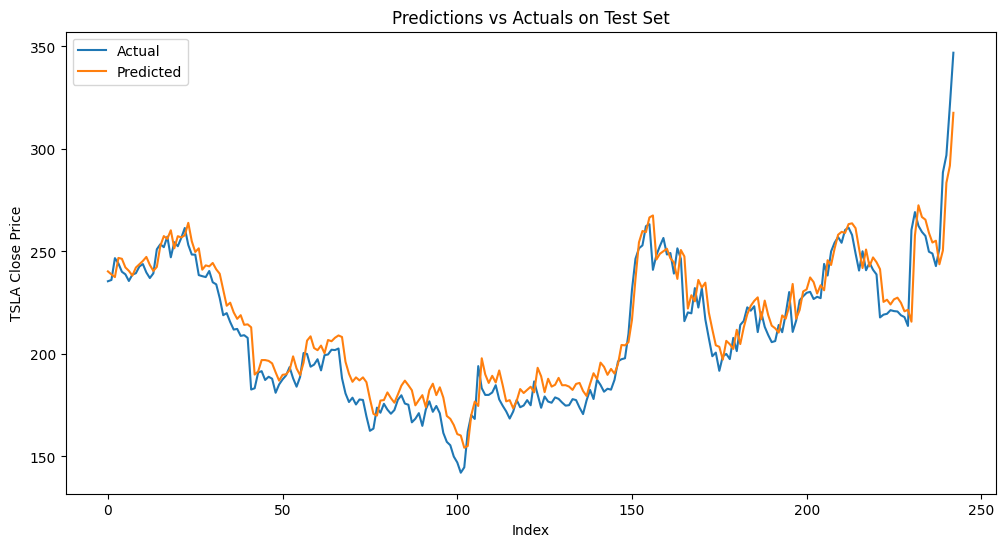

<ipython-input-16-fc5a7526c5db>:153: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load('tsla_rnn_model.pth'))


RNNModel(
  (rnn): RNN(4, 50, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)